In [1]:
import pandas as pd
import numpy as np
import os
import squarify
from scipy import stats
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
%matplotlib inline

C:\Users\binmh\AppData\Local\Temp\ipykernel_12316\1138320160.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv('auto_mpg_dataset.csv')

In [3]:
df.shape

(86, 9)

In [4]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,Car model
0,17.0,8,302,140,3449,10.5,70,1,ford
1,14.0,8,454,220,4354,9.0,70,1,chevrolet
2,15.0,8,390,190,3850,8.5,70,1,amc
3,22.0,6,198,95,2833,15.5,70,1,plymouth
4,18.0,6,199,97,2774,15.5,70,1,amc


In [5]:
df.dtypes

mpg             float64
cylinders         int64
displacement      int64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
Car model        object
dtype: object

In [6]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
Car model       0
dtype: int64

In [7]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'Car model'],
      dtype='object')

In [8]:
df.dtypes

mpg             float64
cylinders         int64
displacement      int64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
Car model        object
dtype: object

In [9]:
mask = df.isin(['?','#VALUE!']).any()
print(mask)

mpg             False
cylinders       False
displacement    False
horsepower       True
weight          False
acceleration    False
model year      False
origin          False
Car model        True
dtype: bool


In [10]:
columns_with_missing_values = mask[mask].index
print(columns_with_missing_values)

Index(['horsepower', 'Car model'], dtype='object')


In [11]:
df_cleaned = df[~df.isin(['?','#VALUE!']).any(axis=1)]

In [12]:
df_cleaned.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'Car model'],
      dtype='object')

In [13]:
df_cleaned['horsepower'] = df_cleaned['horsepower'].astype('float')
df_cleaned['displacement'] = df_cleaned['displacement'].astype('float')
df_cleaned['mpg'] = df_cleaned['mpg'].astype('float')
df_cleaned['weight'] = df_cleaned['weight'].astype('float')
df_cleaned['acceleration'] = df_cleaned['acceleration'].astype('float')
df_cleaned['origin'] = df_cleaned['origin'].astype('category')
df_cleaned['model year'] = df_cleaned['model year'].astype('category')
df_cleaned['cylinders'] = df_cleaned['cylinders'].astype('category')
df_cleaned['Car model'] = df_cleaned['Car model'].astype('category')

C:\Users\binmh\AppData\Local\Temp\ipykernel_12316\1985287531.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['horsepower'] = df_cleaned['horsepower'].astype('float')
C:\Users\binmh\AppData\Local\Temp\ipykernel_12316\1985287531.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['displacement'] = df_cleaned['displacement'].astype('float')
C:\Users\binmh\AppData\Local\Temp\ipykernel_12316\1985287531.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

In [14]:
df_cleaned.dtypes

mpg              float64
cylinders       category
displacement     float64
horsepower       float64
weight           float64
acceleration     float64
model year      category
origin          category
Car model       category
dtype: object

In [15]:
df_cleaned.reset_index(drop=True, inplace=True)

# Data Visualization

## Histograms

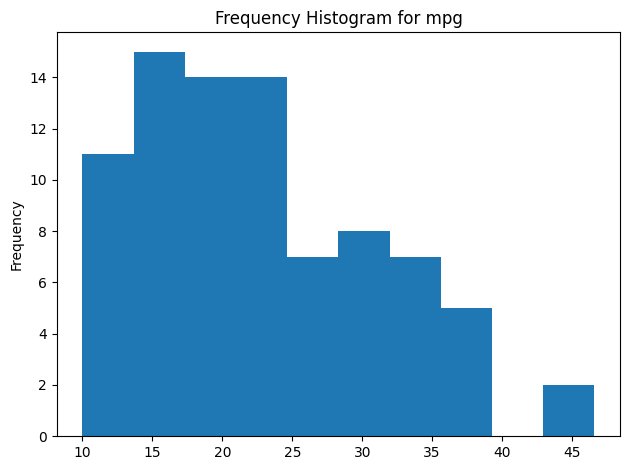

In [16]:
df_cleaned['mpg'].plot.hist()
plt.title("Frequency Histogram for mpg")
plt.tight_layout()

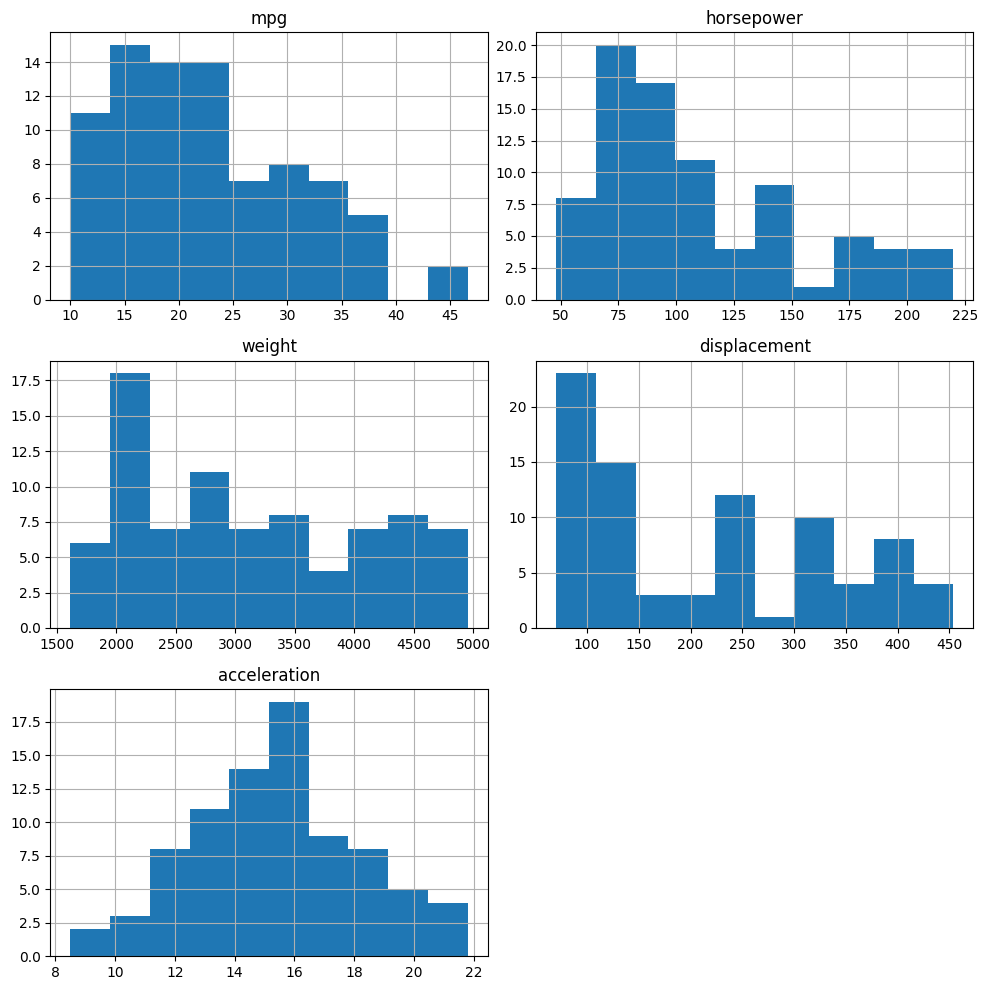

In [17]:
df_cleaned[['mpg', 'horsepower', 'weight', 'displacement','acceleration']].hist(figsize=(10,10))
plt.tight_layout()

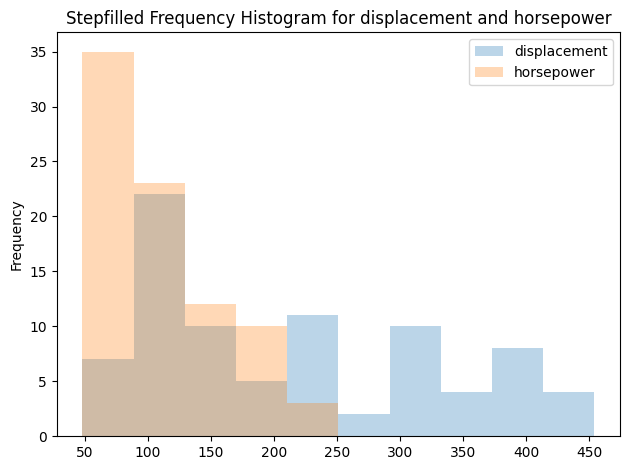

In [18]:
df_cleaned[['displacement','horsepower']].plot.hist(histtype = "stepfilled", bins=10, alpha=0.3)
plt.title("Stepfilled Frequency Histogram for displacement and horsepower")
plt.tight_layout()

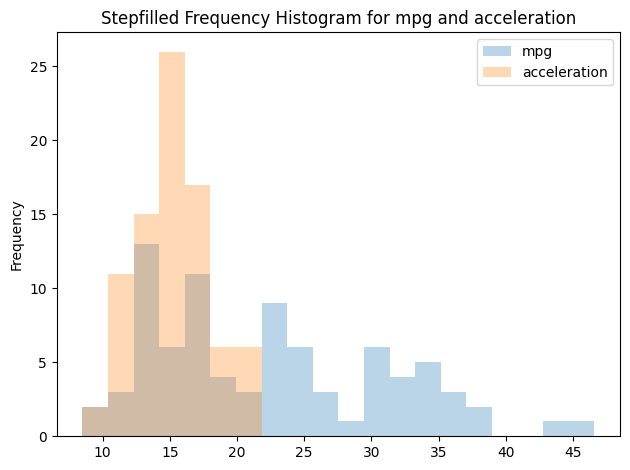

In [19]:
df_cleaned[['mpg','acceleration']].plot.hist(histtype = "stepfilled", bins=20, alpha=0.3)
plt.title("Stepfilled Frequency Histogram for mpg and acceleration")
plt.tight_layout()

## Density Plots

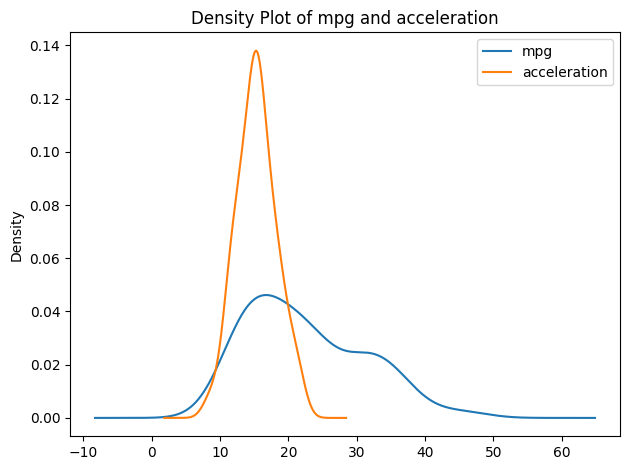

In [20]:
df_cleaned[['mpg','acceleration']].plot.density()
plt.title("Density Plot of mpg and acceleration")
plt.tight_layout()

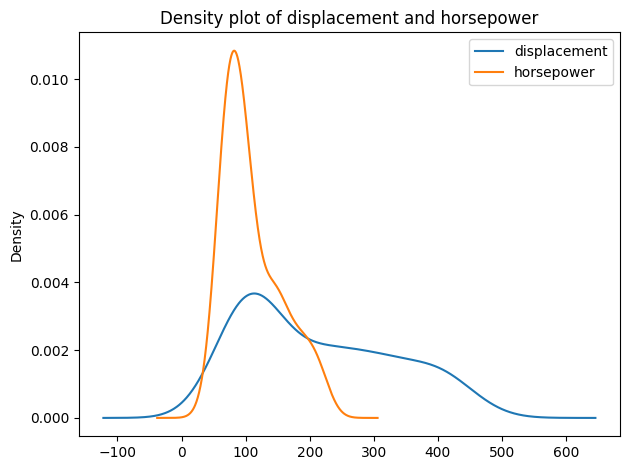

In [21]:
df_cleaned[['displacement','horsepower']].plot.density()
plt.title("Density plot of displacement and horsepower")
plt.tight_layout()

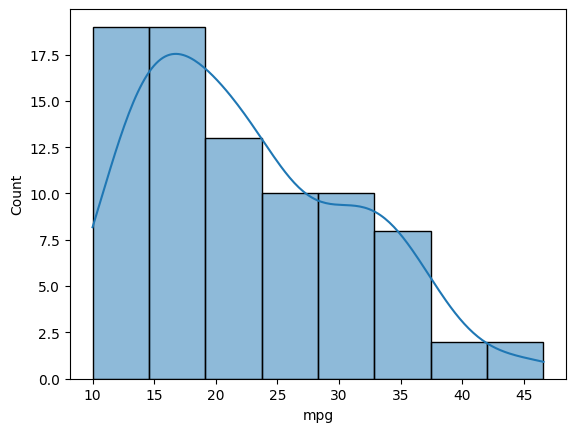

In [22]:
sns.histplot(data=df_cleaned, x='mpg', kde=True);

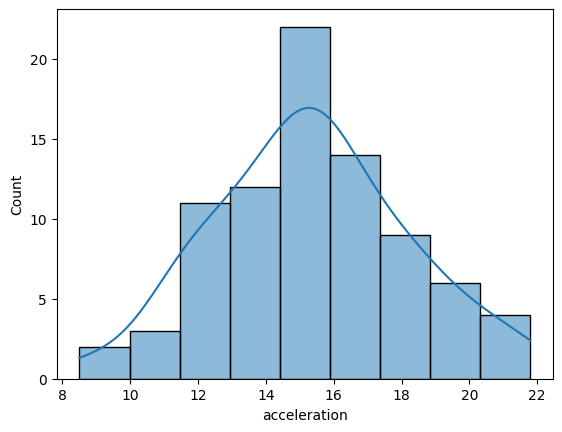

In [23]:
sns.histplot(data=df_cleaned, x='acceleration', kde=True);

## Box Plots

In [24]:
# Count of number of cars for each model
car_model_counts = df_cleaned['Car model'].value_counts()

# Select 4 top car models, argument for .head() can be changed to choose any number of top car models
top_car_models = car_model_counts.head(4).index

# Filter dataset for the selected car models
selected_data = df_cleaned[df_cleaned['Car model'].isin(top_car_models)]

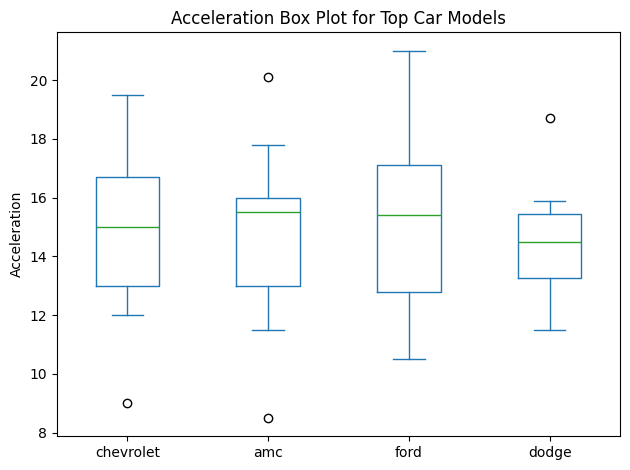

In [25]:
acceleration_data = {}
for car_model in top_car_models:
    acceleration_data[car_model] = selected_data[selected_data['Car model'] == car_model]['acceleration']

acc_data = pd.DataFrame(acceleration_data)

# Plotting data
acc_data.plot.box(whis=1)
plt.ylabel("Acceleration")
plt.title("Acceleration Box Plot for Top Car Models")
plt.tight_layout()

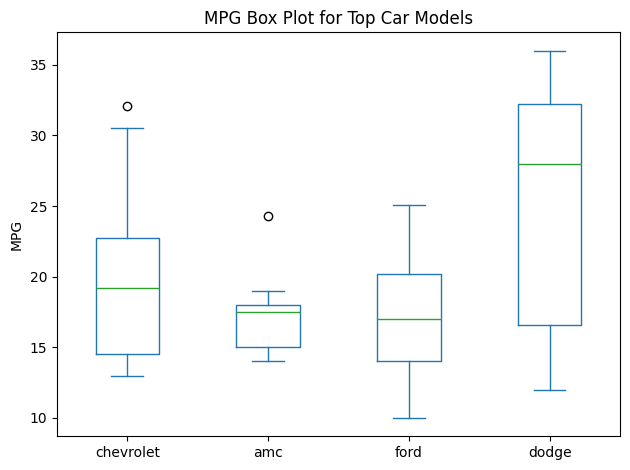

In [26]:
# Filter mpg data for the selected car models
mpg_data = {}
for car_model in top_car_models:
    mpg_data[car_model] = selected_data[selected_data['Car model'] == car_model]['mpg']

# mpg dataframe
mpg_data = pd.DataFrame(mpg_data)

# Plotting data
mpg_data.plot.box(whis=1)
plt.ylabel("MPG")
plt.title("MPG Box Plot for Top Car Models")
plt.tight_layout()

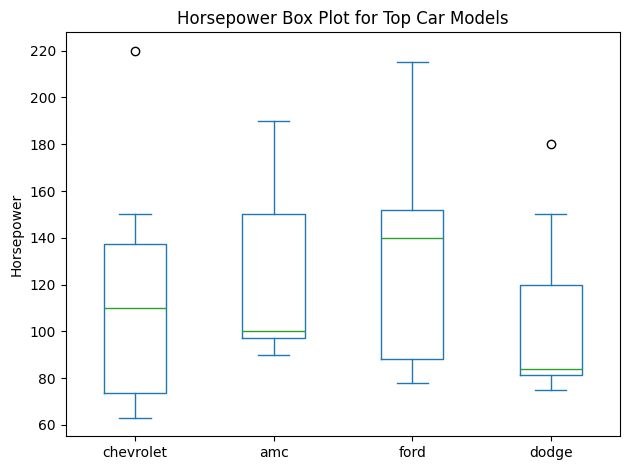

In [27]:
# Filter horsepower data for the selected car models
horsepower_data = {}
for car_model in top_car_models:
    horsepower_data[car_model] = selected_data[selected_data['Car model'] == car_model]['horsepower']

# DataFrame for the horsepower
horsepower_data = pd.DataFrame(horsepower_data)

# Plotting data
horsepower_data.plot.box(whis=1)
plt.ylabel("Horsepower")
plt.title("Horsepower Box Plot for Top Car Models")
plt.tight_layout()

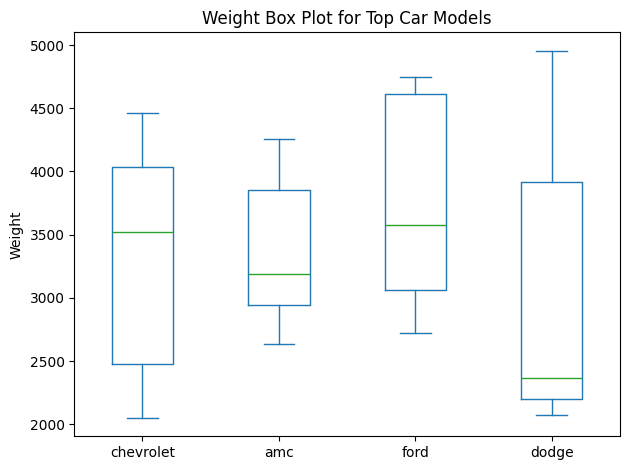

In [28]:
# Filter weight for the selected car models
weight_data = {}
for car_model in top_car_models:
    weight_data[car_model] = selected_data[selected_data['Car model'] == car_model]['weight']

# dataframe for weight data
weight_data = pd.DataFrame(weight_data)

# Plotting data
weight_data.plot.box(whis=1)
plt.ylabel("Weight")
plt.title("Weight Box Plot for Top Car Models")
plt.tight_layout()

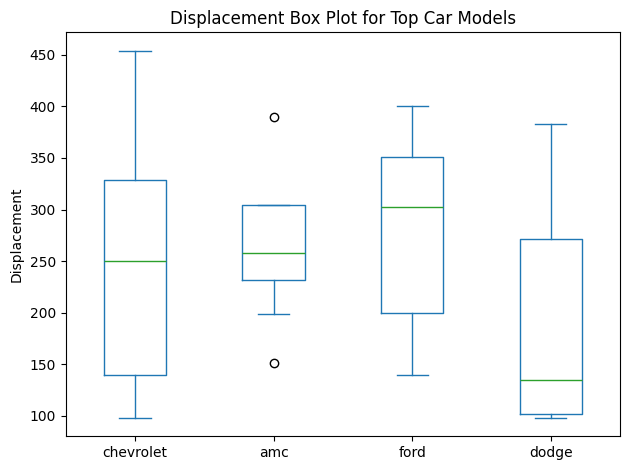

In [29]:
displacement_data = {}
for car_model in top_car_models:
    displacement_data[car_model] = selected_data[selected_data['Car model'] == car_model]['displacement']

displacement_data = pd.DataFrame(displacement_data)

# Plotting data
displacement_data.plot.box(whis=1)
plt.ylabel("Displacement")
plt.title("Displacement Box Plot for Top Car Models")
plt.tight_layout()

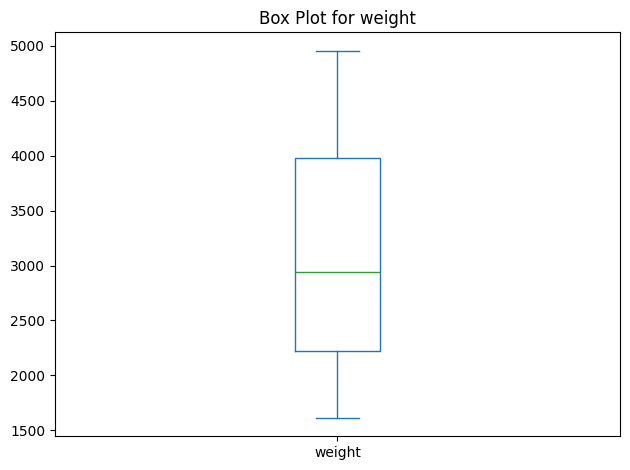

In [30]:
df_cleaned["weight"].plot.box(whis=1)
plt.title("Box Plot for weight")
plt.tight_layout()

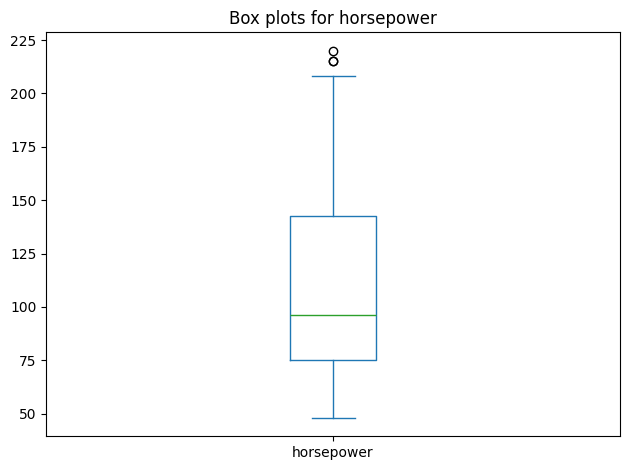

In [31]:
df_cleaned[["horsepower"]].plot.box(whis=1)
plt.title("Box plots for horsepower")
plt.tight_layout()

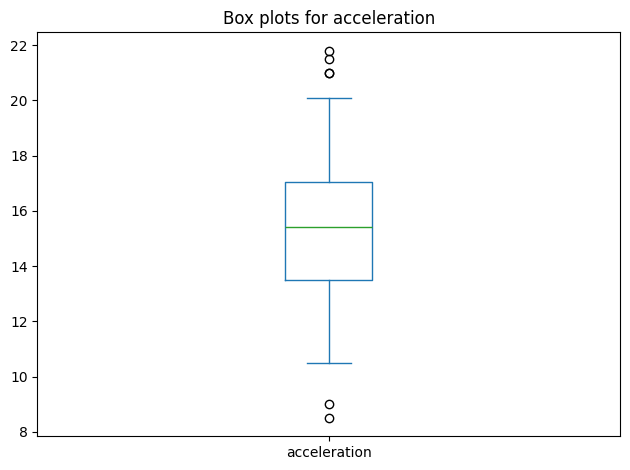

In [32]:
df_cleaned[["acceleration"]].plot.box(whis=1)
plt.title("Box plots for acceleration")
plt.tight_layout()

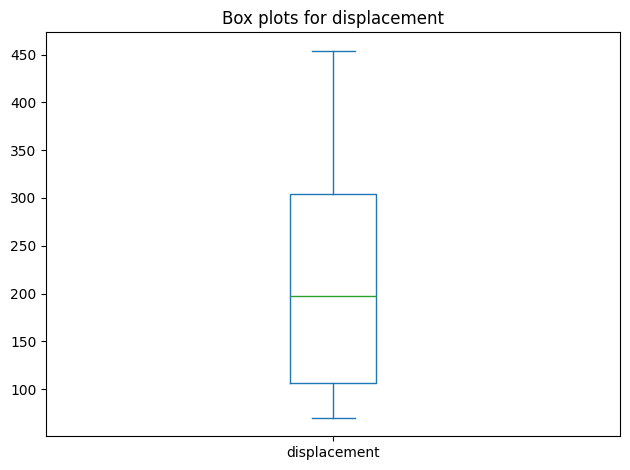

In [33]:
df_cleaned[["displacement"]].plot.box(whis=1)
plt.title("Box plots for displacement")
plt.tight_layout()

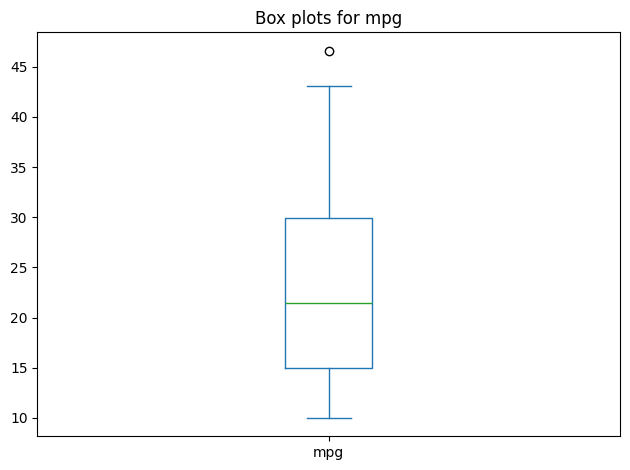

In [34]:
df_cleaned[["mpg"]].plot.box(whis=1)
plt.title("Box plots for mpg")
plt.tight_layout()

## Bar Charts

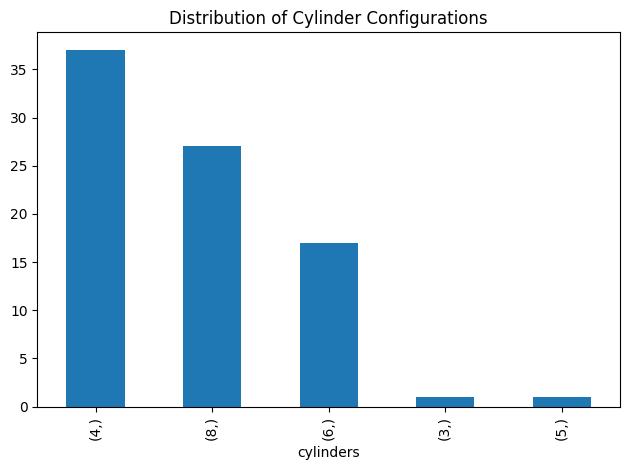

In [35]:
df_cleaned[["cylinders"]].value_counts().plot(kind='bar')
plt.title("Distribution of Cylinder Configurations")
plt.tight_layout()

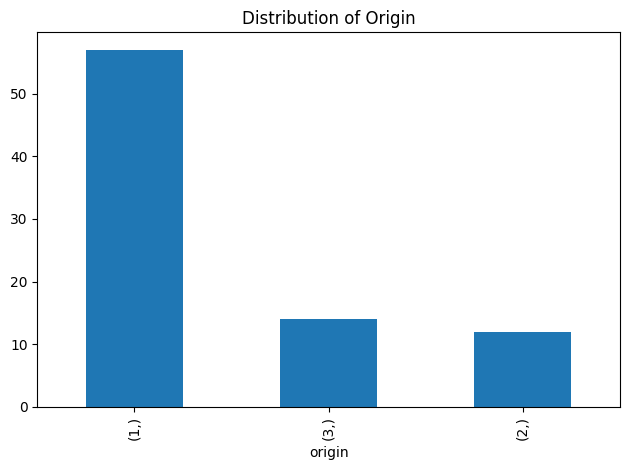

In [36]:
df_cleaned[["origin"]].value_counts().plot(kind='bar')
plt.title("Distribution of Origin")
plt.tight_layout()

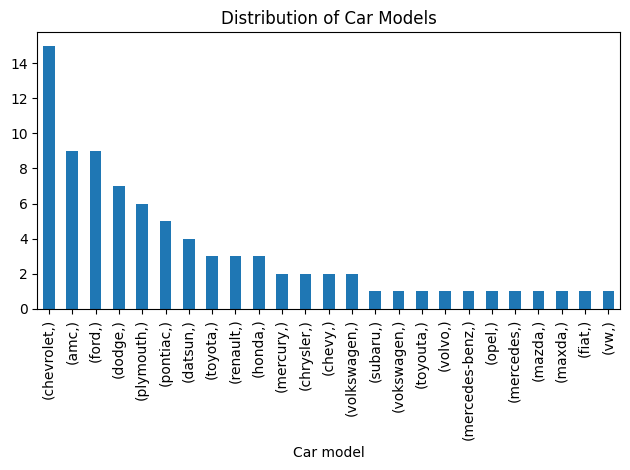

In [37]:
df_cleaned[["Car model"]].value_counts().plot(kind='bar')
plt.title("Distribution of Car Models")
plt.tight_layout()

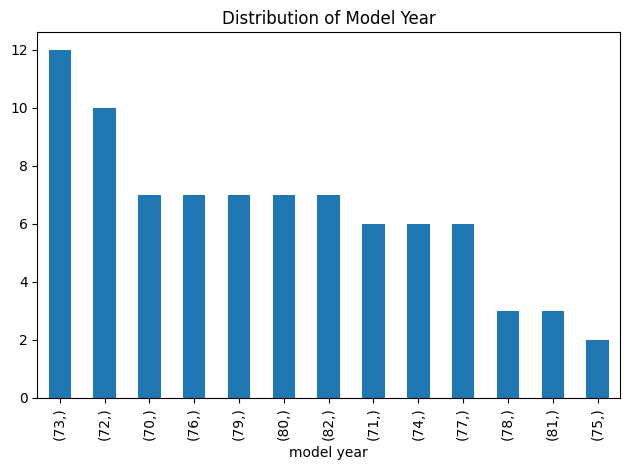

In [38]:
df_cleaned[["model year"]].value_counts().plot(kind='bar')
plt.title("Distribution of Model Year")
plt.tight_layout()

## Descriptive Statistics

In [39]:
df_cleaned[["mpg","displacement","horsepower","weight","acceleration"]].describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,83.0,22.502410,8.500660,10.0,15.0,21.5,29.90,46.6
displacement,83.0,212.939759,116.006765,70.0,106.0,198.0,304.50,454.0
horsepower,83.0,109.891566,44.640846,48.0,75.0,96.0,142.50,220.0
weight,83.0,3129.867470,959.661447,1613.0,2217.5,2945.0,3975.00,4955.0
acceleration,83.0,15.324096,2.851041,8.5,13.5,15.4,17.05,21.8


In [40]:
df_cleaned[["mpg","displacement","horsepower","weight","acceleration"]].median()

mpg               21.5
displacement     198.0
horsepower        96.0
weight          2945.0
acceleration      15.4
dtype: float64

In [41]:
df_cleaned.quantile(0.05,numeric_only=True)

mpg               12.10
displacement      81.40
horsepower        63.20
weight          1853.00
acceleration      11.05
Name: 0.05, dtype: float64

In [42]:
df_cleaned.quantile(0.95,numeric_only=True)

mpg               36.0
displacement     400.0
horsepower       199.8
weight          4665.0
acceleration      20.1
Name: 0.95, dtype: float64

In [43]:
df_cleaned[["Car model", "origin", "model year", "cylinders"]].describe()

,Car model,origin,model year,cylinders
count,83,83,83,83
unique,25,3,13,5
top,chevrolet,1,73,4
freq,15,57,12,37


In [44]:
#Delete outliers
df_cleaned.shape

# Calculate the number of rows to remove (last 5%)
num_rows_to_remove = int(len(df_cleaned) * 0.05)
print(num_rows_to_remove)

# Remove the last 5% of observations
df_cleaned = df_cleaned.iloc[:-num_rows_to_remove]

4


In [45]:
df_cleaned.shape

(79, 9)

## Correlation Matrix

In [46]:
df_cleaned_num = df_cleaned.select_dtypes(include = ['float64'])
df_cleaned_cat = df_cleaned.select_dtypes(include= ['category'])

In [47]:
df_cleaned_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           79 non-null     float64
 1   displacement  79 non-null     float64
 2   horsepower    79 non-null     float64
 3   weight        79 non-null     float64
 4   acceleration  79 non-null     float64
dtypes: float64(5)
memory usage: 3.2 KB


In [48]:
df_cleaned_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   cylinders   79 non-null     category
 1   model year  79 non-null     category
 2   origin      79 non-null     category
 3   Car model   79 non-null     category
dtypes: category(4)
memory usage: 2.2 KB


In [49]:
df_cleaned_num.corr()

,mpg,displacement,horsepower,weight,acceleration
mpg,1.000000,-0.840456,-0.810814,-0.855124,0.579212
displacement,-0.840456,1.000000,0.927228,0.953494,-0.670457
horsepower,-0.810814,0.927228,1.000000,0.894945,-0.764035
weight,-0.855124,0.953494,0.894945,1.000000,-0.558050
acceleration,0.579212,-0.670457,-0.764035,-0.558050,1.000000


In [50]:
corr_matrix = df_cleaned_num.corr()
p_matrix = np.zeros((5, 5))

# Calculating p-values
for i in range(5):
    for j in range(i+1, 5):
        corr_coef, p_value = stats.pearsonr(df_cleaned_num.iloc[:, i], df_cleaned_num.iloc[:, j])
        p_matrix[i, j] = p_value
        p_matrix[j, i] = p_value

p_matrix_df = pd.DataFrame(p_matrix, index=df_cleaned_num.columns, columns=df_cleaned_num.columns)

print("P-Value Matrix:")
print(p_matrix_df)

P-Value Matrix:
                       mpg  displacement    horsepower        weight  \
mpg           0.000000e+00  3.475806e-22  1.361242e-19  1.132330e-23   
displacement  3.475806e-22  0.000000e+00  1.395766e-34  7.462511e-42   
horsepower    1.361242e-19  1.395766e-34  0.000000e+00  1.037715e-28   
weight        1.132330e-23  7.462511e-42  1.037715e-28  0.000000e+00   
acceleration  2.241619e-08  1.390580e-11  2.603062e-16  9.129405e-08   

              acceleration  
mpg           2.241619e-08  
displacement  1.390580e-11  
horsepower    2.603062e-16  
weight        9.129405e-08  
acceleration  0.000000e+00  


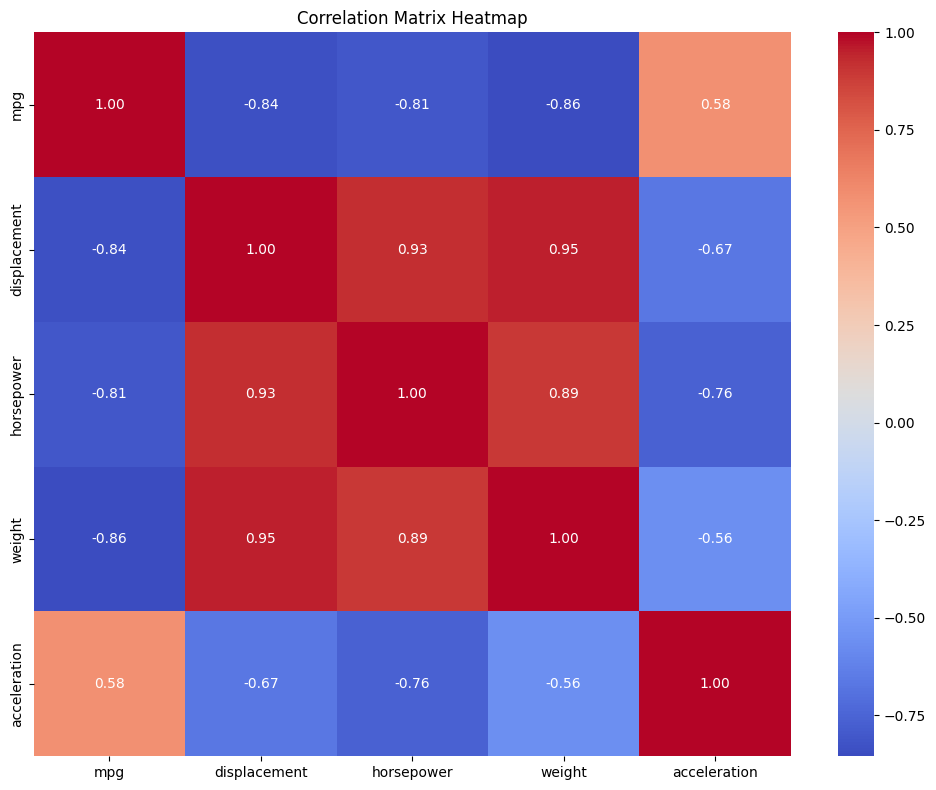

In [51]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_cleaned_num.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()

In [52]:
pearson_coef, p_value = stats.pearsonr(df_cleaned_num["mpg"], df_cleaned_num["acceleration"])
print("Pearson Correlation Coefficient: ", pearson_coef, "and a P-value of:", p_value) # Results

Pearson Correlation Coefficient:  0.5792115798914161 and a P-value of: 2.2416188729061084e-08


In [53]:
pearson_coef, p_value = stats.pearsonr(df_cleaned_num["mpg"], df_cleaned_num["horsepower"])
print("Pearson Correlation Coefficient: ", pearson_coef, "and a P-value of:", p_value) # Results

Pearson Correlation Coefficient:  -0.8108137116656041 and a P-value of: 1.3612424953194014e-19


In [54]:
res=stats.pearsonr(df_cleaned_num["mpg"], df_cleaned_num["weight"])
print(f"correlation value is {round(res[0],4)} and p-value is {res[1]:.3E}")

correlation value is -0.8551 and p-value is 1.132E-23


In [55]:
res=stats.pearsonr(df_cleaned_num["mpg"], df_cleaned_num["displacement"])
print(f"correlation value is {round(res[0],4)} and p-value is {res[1]:.3E}")

correlation value is -0.8405 and p-value is 3.476E-22


In [56]:
res=stats.pearsonr(df_cleaned_num["displacement"], df_cleaned["cylinders"])
print(f"correlation value is {round(res[0],4)} and p-value is {res[1]:.3E}")

correlation value is 0.9483 and p-value is 4.109E-40


In [57]:
res=stats.pearsonr(df_cleaned_num["horsepower"], df_cleaned["cylinders"])
print(f"correlation value is {round(res[0],4)} and p-value is {res[1]:.3E}")

correlation value is 0.8717 and p-value is 1.456E-25


In [58]:
pd.crosstab(df_cleaned["Car model"], columns=df_cleaned["origin"]).apply(lambda row: row/row.sum(), axis=1)

origin,1,2,3
Car model,,,
amc,1.0,0.0,0.0
chevrolet,1.0,0.0,0.0
chevy,1.0,0.0,0.0
chrysler,1.0,0.0,0.0
datsun,0.0,0.0,1.0
dodge,1.0,0.0,0.0
fiat,0.0,1.0,0.0
ford,1.0,0.0,0.0
honda,0.0,0.0,1.0


In [59]:
pd.crosstab(df_cleaned["model year"], columns=df_cleaned["cylinders"])

cylinders,3,4,5,6,8
model year,,,,,
70,0,0,0,2,5
71,0,2,0,1,3
72,0,5,0,0,5
73,1,3,0,2,6
74,0,2,0,1,3
75,0,1,0,0,1
76,0,1,0,4,2
77,0,3,0,3,0
78,0,3,0,0,0


## Scatter Plots for Bivariate Analysis

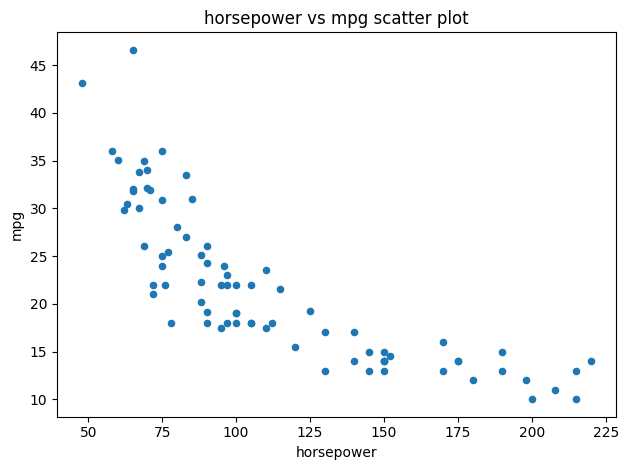

In [60]:
df_cleaned.plot.scatter(x="horsepower", y="mpg")
plt.title("horsepower vs mpg scatter plot")
plt.tight_layout()

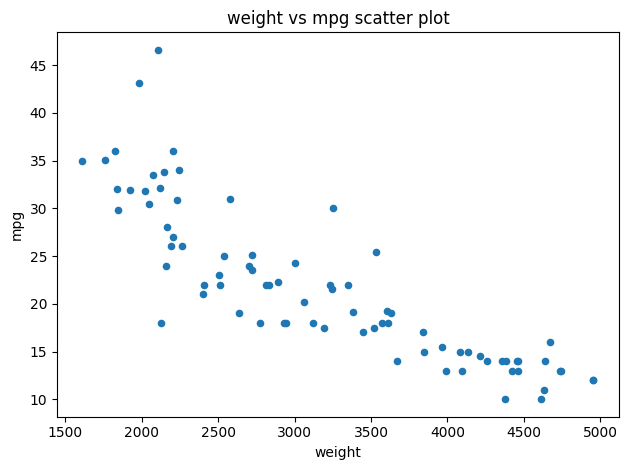

In [61]:
df_cleaned.plot.scatter(x="weight", y="mpg")
plt.title("weight vs mpg scatter plot")
plt.tight_layout()

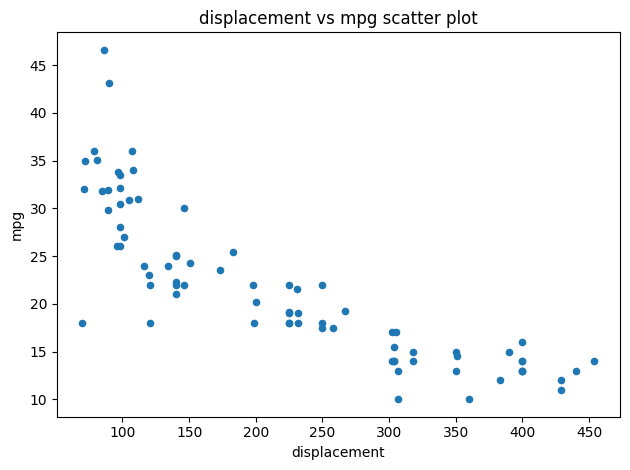

In [62]:
df_cleaned.plot.scatter(x="displacement", y="mpg")
plt.title("displacement vs mpg scatter plot")
plt.tight_layout()

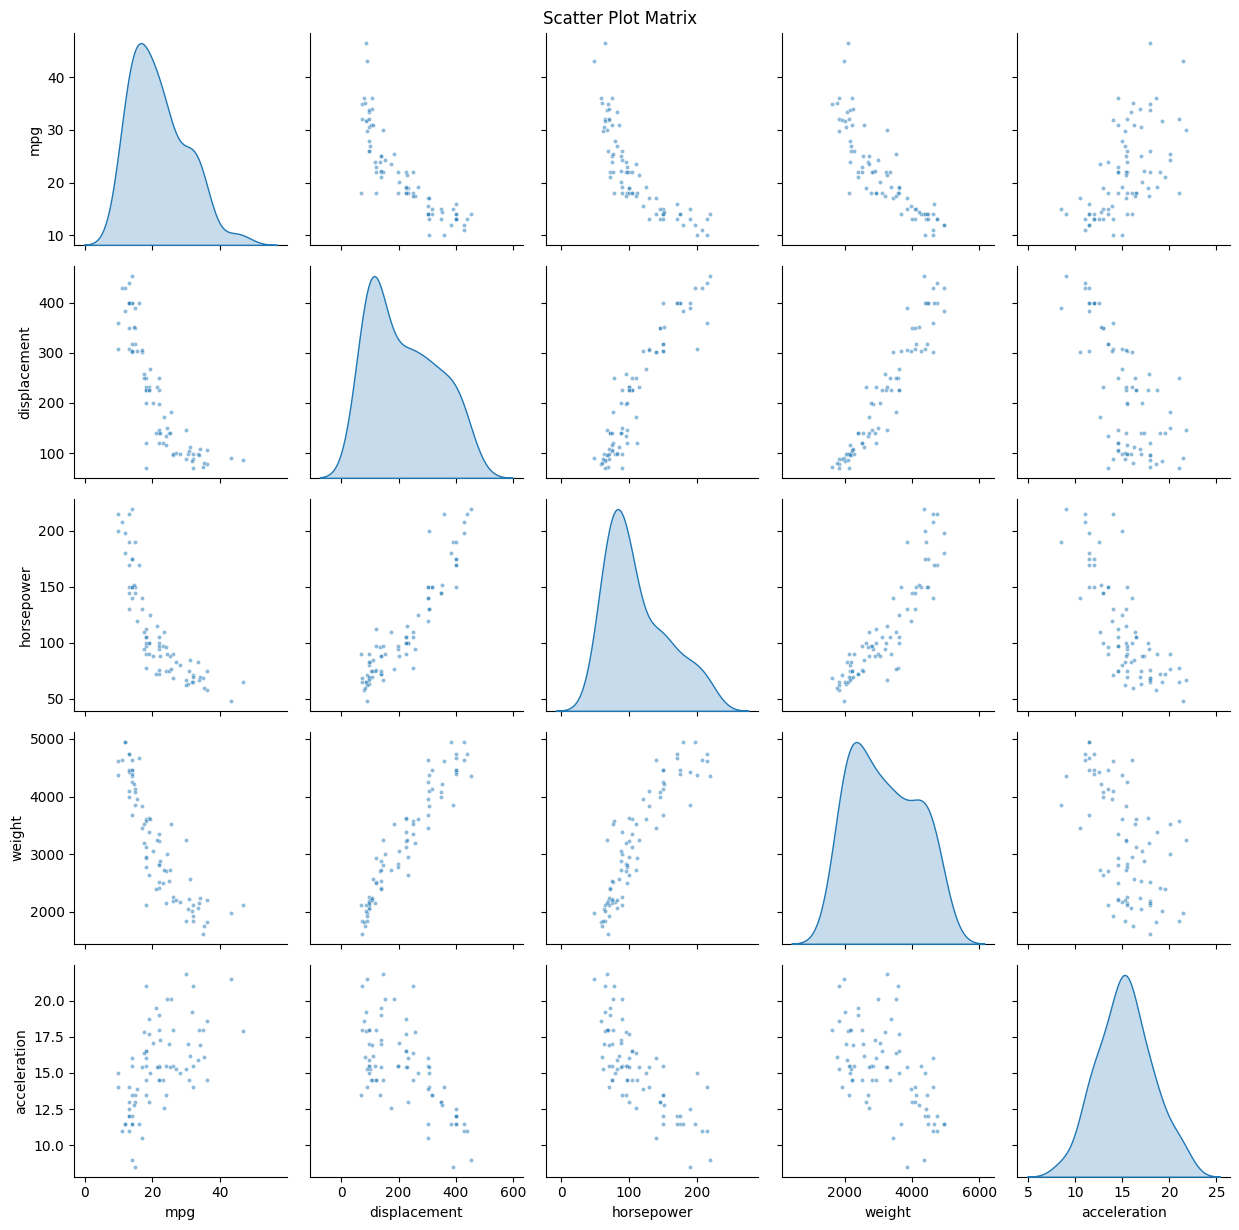

In [63]:
# Scatter Plot Matrix
sns.pairplot(df_cleaned, diag_kind='kde', markers='.', plot_kws={'alpha': 0.5})
plt.suptitle('Scatter Plot Matrix')
plt.tight_layout()

## Bar Charts, Pie Charts, and TreeMaps for Bivariate analysis

C:\Users\binmh\AppData\Local\Temp\ipykernel_12316\1015860590.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_cleaned.groupby("Car model").agg({'mpg':'median'}).plot.bar(figsize=(10,10))


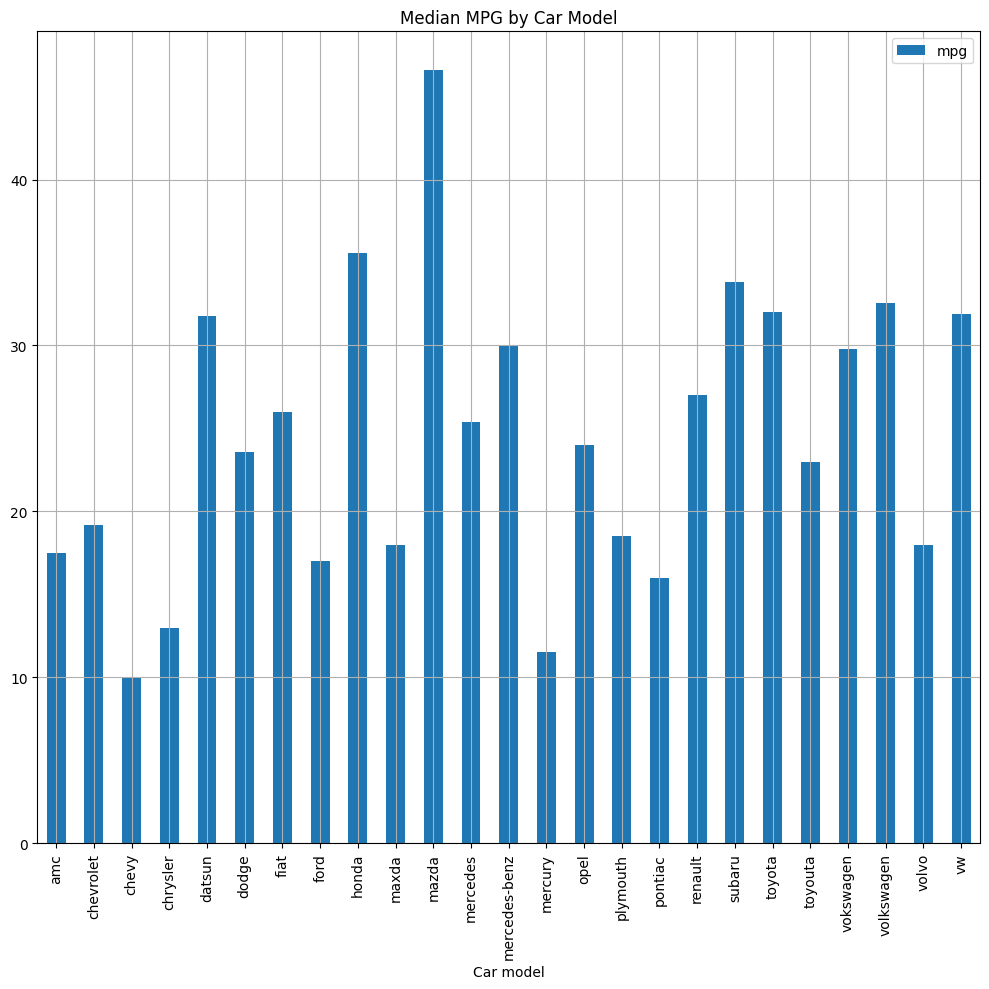

In [64]:
df_cleaned.groupby("Car model").agg({'mpg':'median'}).plot.bar(figsize=(10,10))
plt.grid(True)
plt.title("Median MPG by Car Model")
plt.tight_layout()

C:\Users\binmh\AppData\Local\Temp\ipykernel_12316\723307322.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_cleaned.groupby("Car model").agg({'acceleration':'median'}).plot.bar(figsize=(10,10))


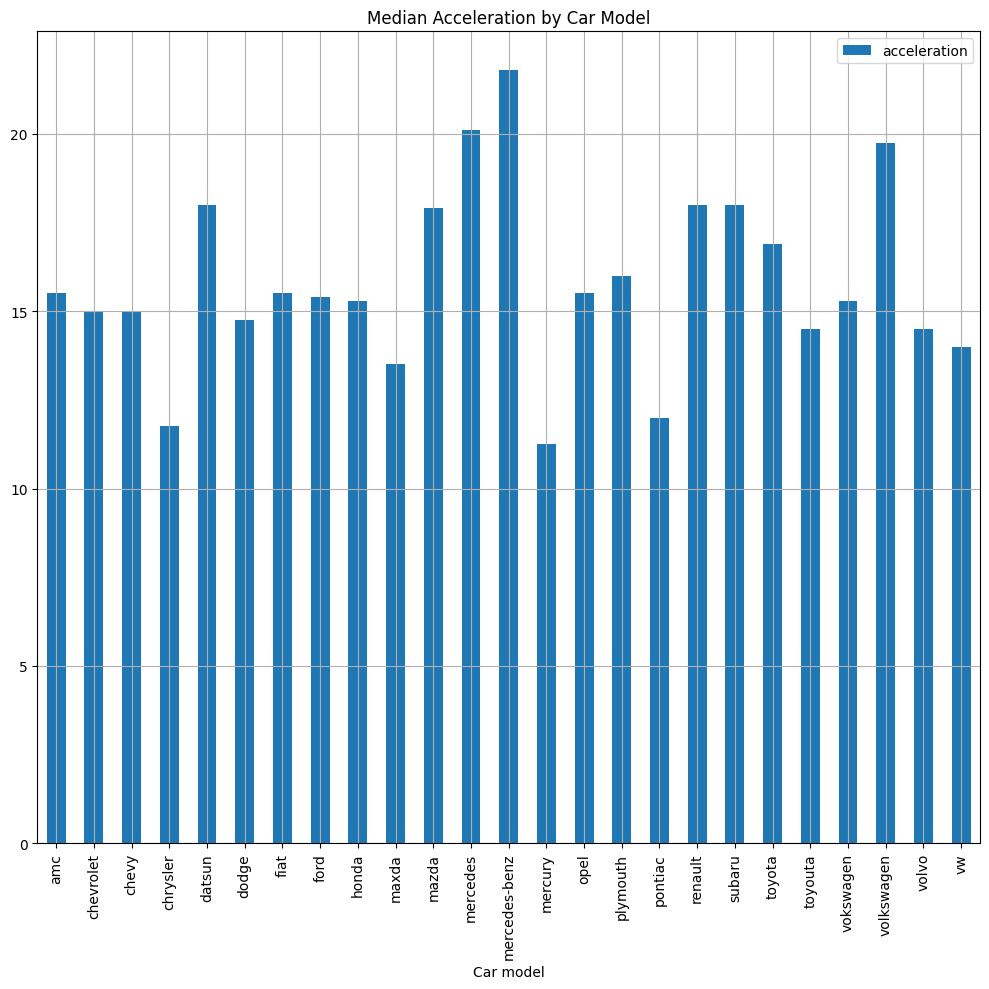

In [65]:
df_cleaned.groupby("Car model").agg({'acceleration':'median'}).plot.bar(figsize=(10,10))
plt.grid(True)
plt.title("Median Acceleration by Car Model")
plt.tight_layout()

C:\Users\binmh\AppData\Local\Temp\ipykernel_12316\659897240.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_mpg_by_cylinders = df_cleaned.groupby('cylinders')['mpg'].median()


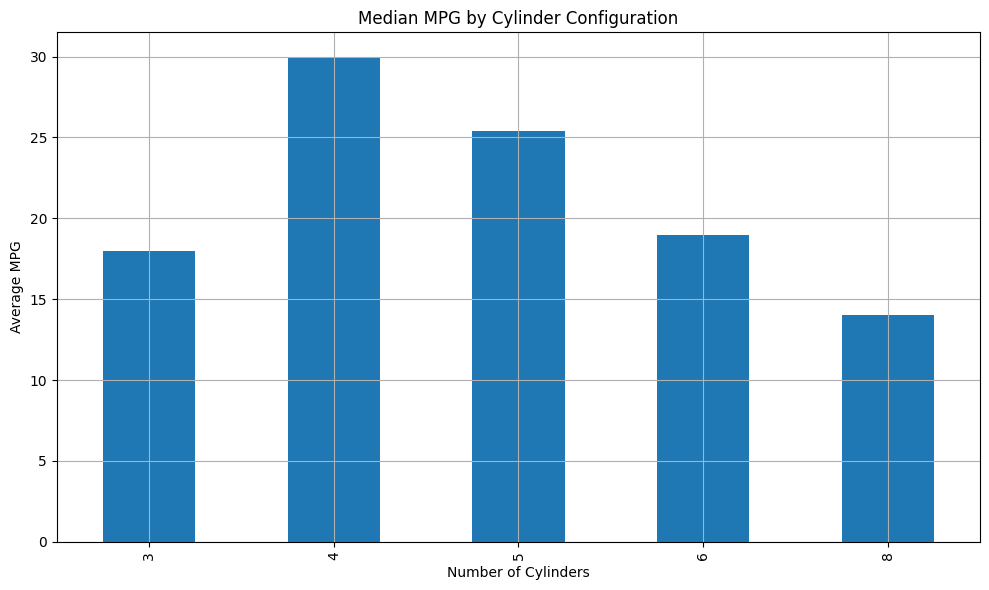

In [66]:
avg_mpg_by_cylinders = df_cleaned.groupby('cylinders')['mpg'].median()

# Plotting part
plt.figure(figsize=(10, 6))
avg_mpg_by_cylinders.plot(kind = "bar")
plt.title('Median MPG by Cylinder Configuration')
plt.xlabel('Number of Cylinders')
plt.ylabel('Average MPG')
plt.grid(True)
plt.tight_layout()

C:\Users\binmh\AppData\Local\Temp\ipykernel_12316\1148199694.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_mpg_by_displacement = df_cleaned.groupby('cylinders')['acceleration'].median()


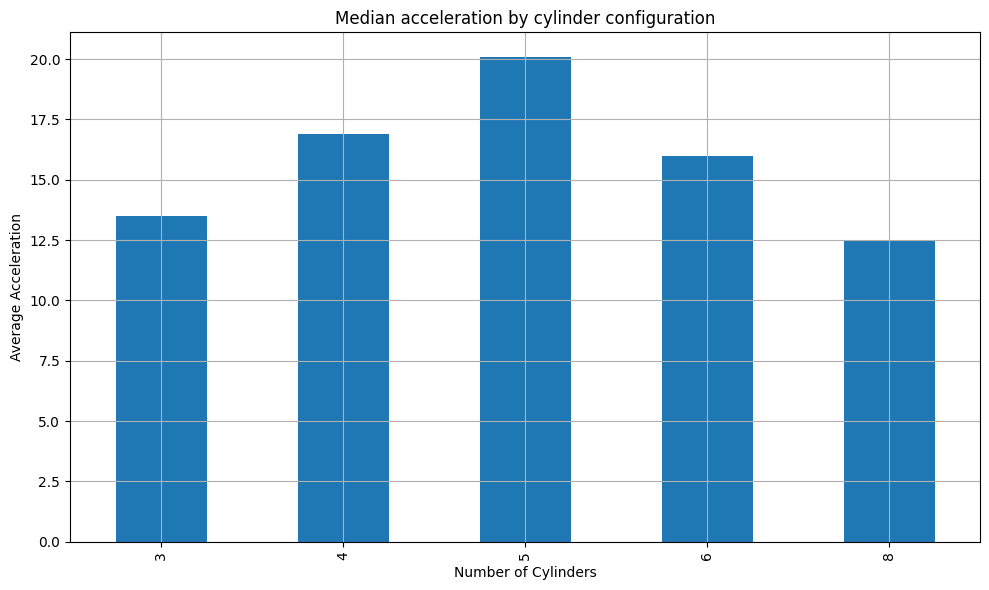

In [67]:
avg_mpg_by_displacement = df_cleaned.groupby('cylinders')['acceleration'].median()

# Plotting
plt.figure(figsize=(10, 6))
avg_mpg_by_displacement.plot(kind = "bar")
plt.title('Median acceleration by cylinder configuration')
plt.xlabel('Number of Cylinders')
plt.ylabel('Average Acceleration')
plt.grid(True)
plt.tight_layout()

C:\Users\binmh\AppData\Local\Temp\ipykernel_12316\4025612280.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_mpg_by_displacement = df_cleaned.groupby('model year')['mpg'].median()


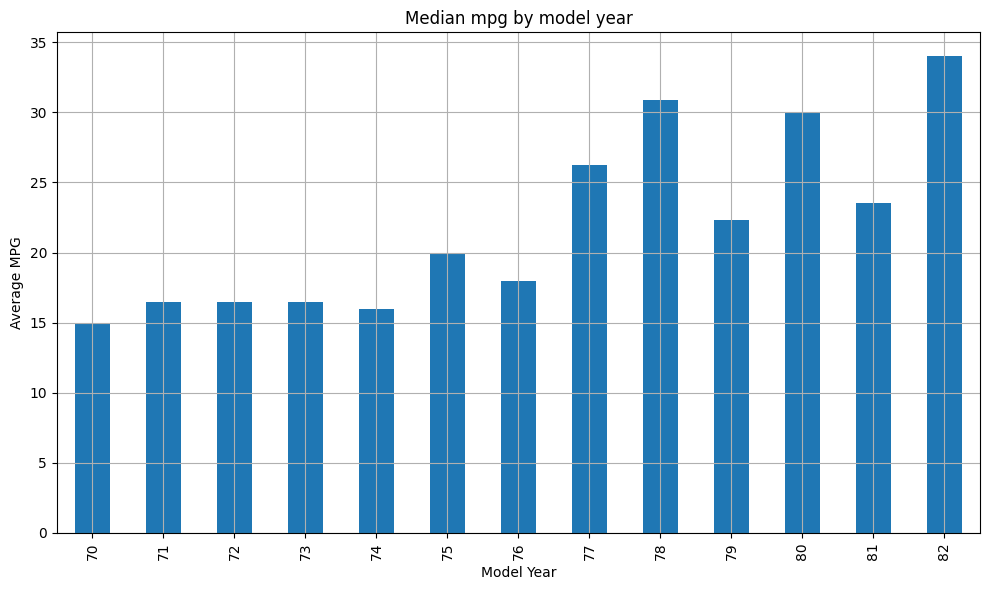

In [68]:
avg_mpg_by_displacement = df_cleaned.groupby('model year')['mpg'].median()

# Plotting
plt.figure(figsize=(10, 6))
avg_mpg_by_displacement.plot(kind = "bar")
plt.title('Median mpg by model year')
plt.xlabel('Model Year')
plt.ylabel('Average MPG')
plt.grid(True)
plt.tight_layout()

C:\Users\binmh\AppData\Local\Temp\ipykernel_12316\535369847.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hpwr_car_model = df_cleaned.groupby("Car model")["horsepower"].median()


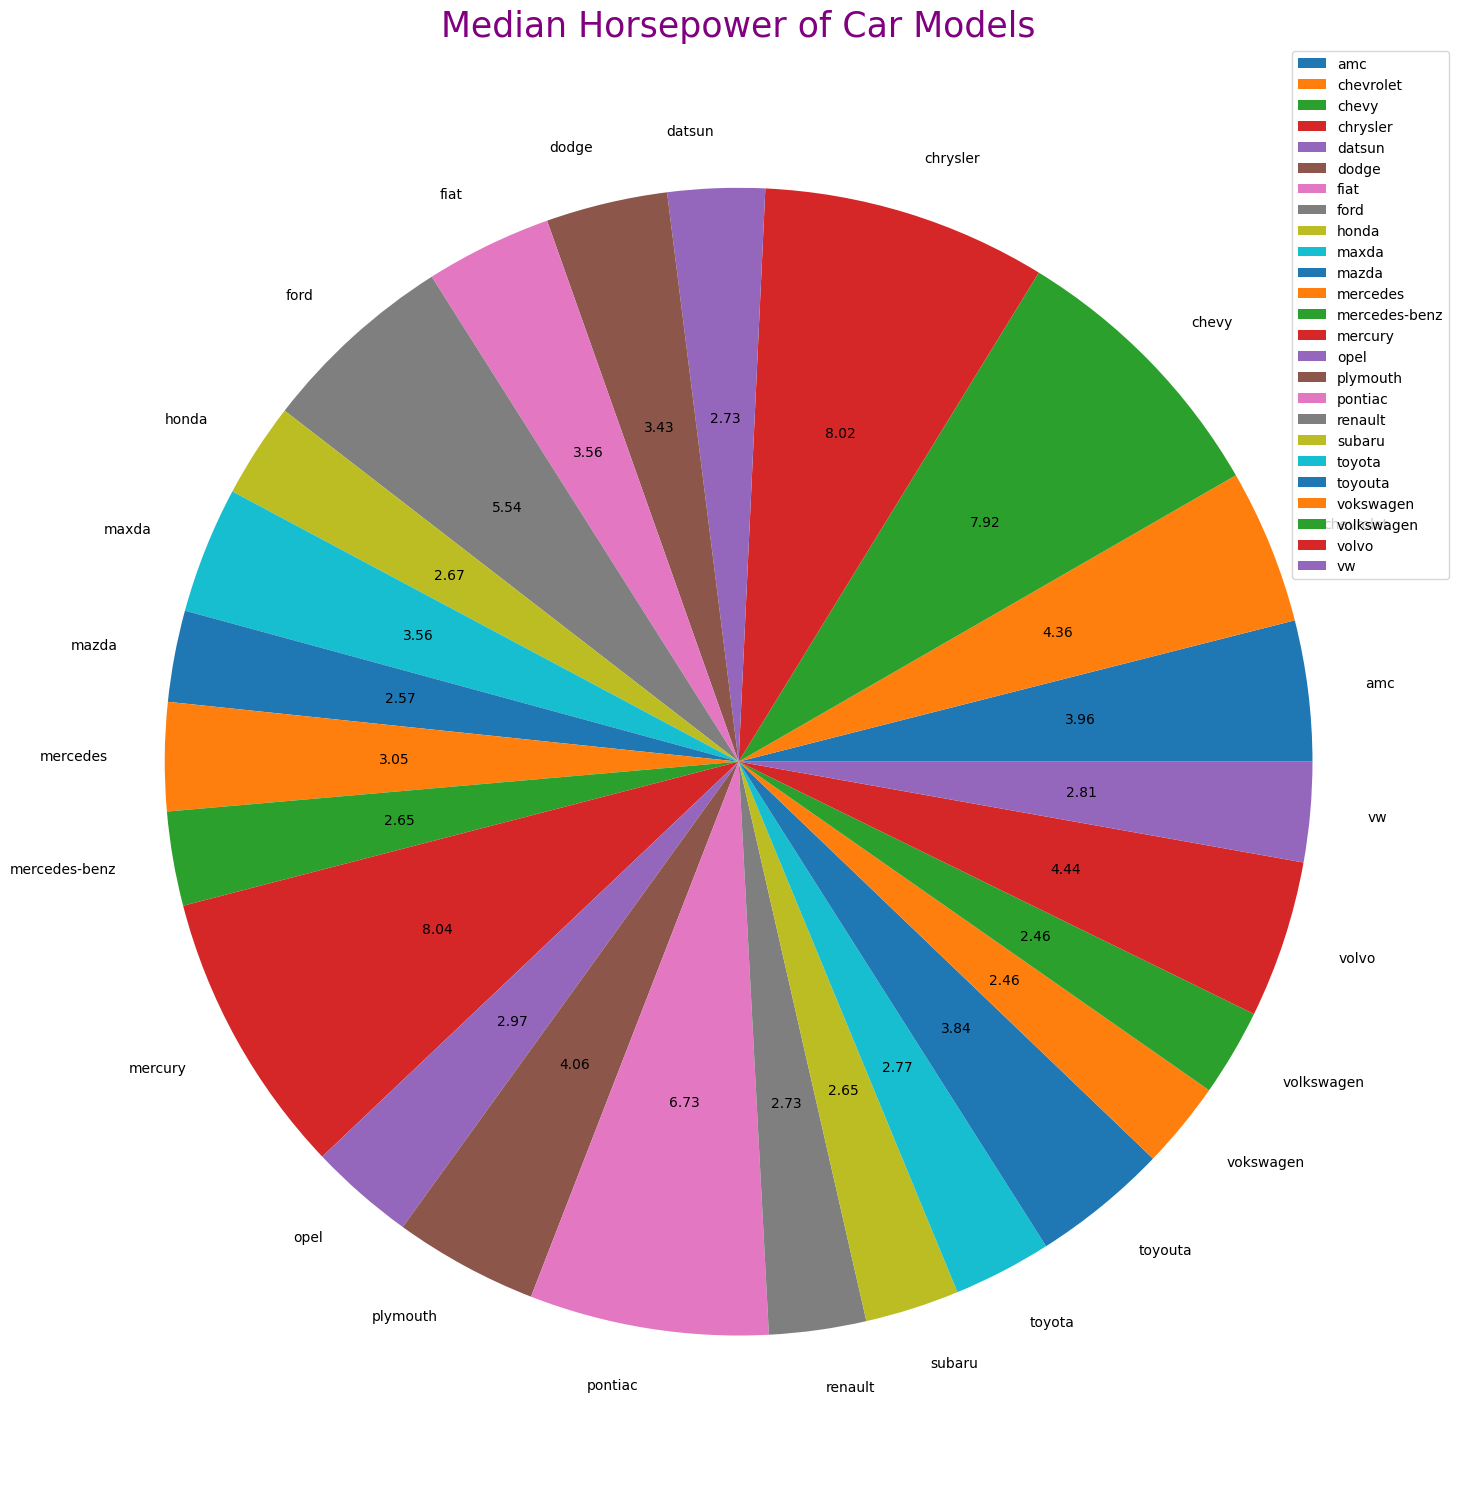

In [69]:
plt.figure(figsize=(15,15))
hpwr_car_model = df_cleaned.groupby("Car model")["horsepower"].median()
labels = hpwr_car_model.index
plt.pie(hpwr_car_model, labels=labels, autopct='%.2f')
plt.title("Median Horsepower of Car Models", fontsize=25, color='purple')
plt.legend()
plt.tight_layout()

C:\Users\binmh\AppData\Local\Temp\ipykernel_12316\3375763834.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mpg_car_model = df_cleaned.groupby("origin")["mpg"].median()


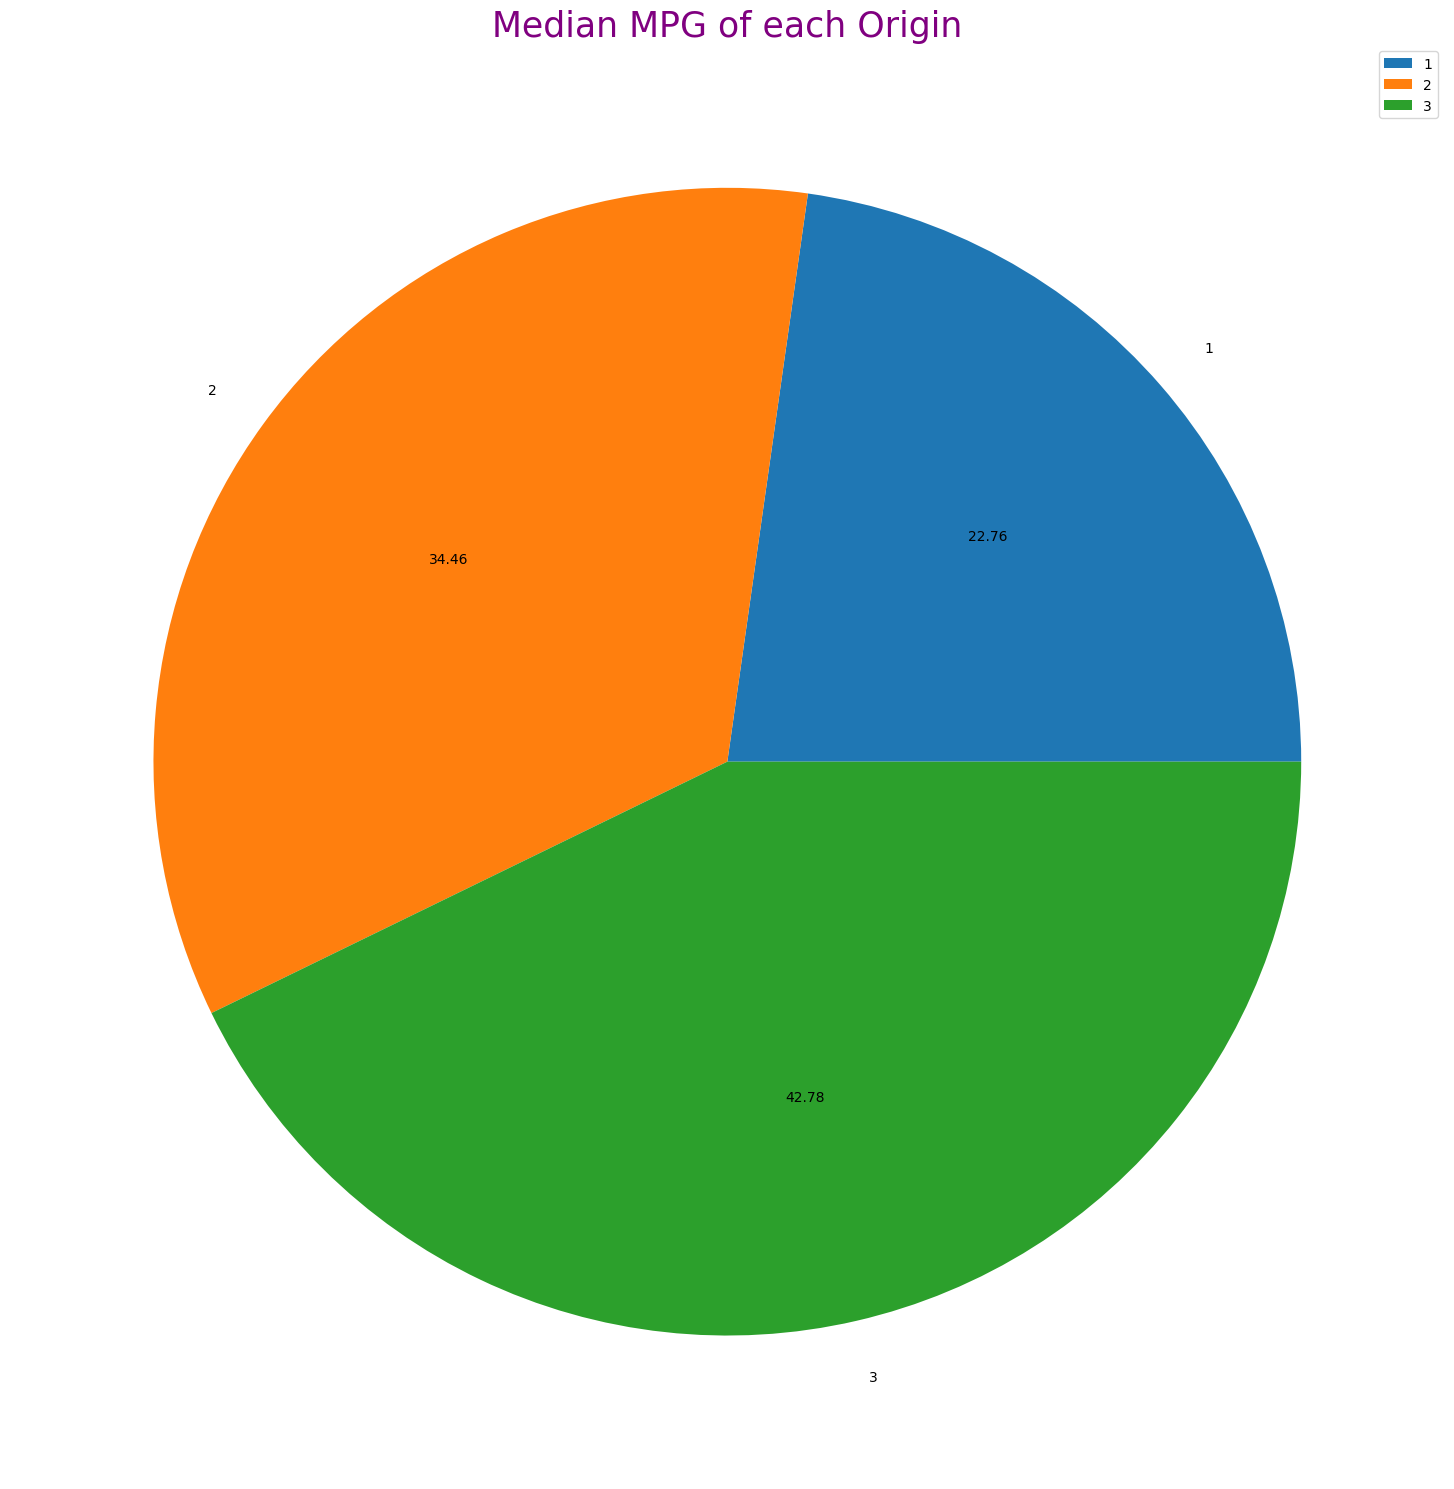

In [70]:
plt.figure(figsize=(15,15))
mpg_car_model = df_cleaned.groupby("origin")["mpg"].median()
labels = mpg_car_model.index
plt.pie(mpg_car_model, labels=labels, autopct='%.2f')
plt.title("Median MPG of each Origin", fontsize=25, color='purple')
plt.legend()
plt.tight_layout()

C:\Users\binmh\AppData\Local\Temp\ipykernel_12316\3288174128.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weight_data_median = df_cleaned.groupby("Car model")["weight"].median().reset_index()


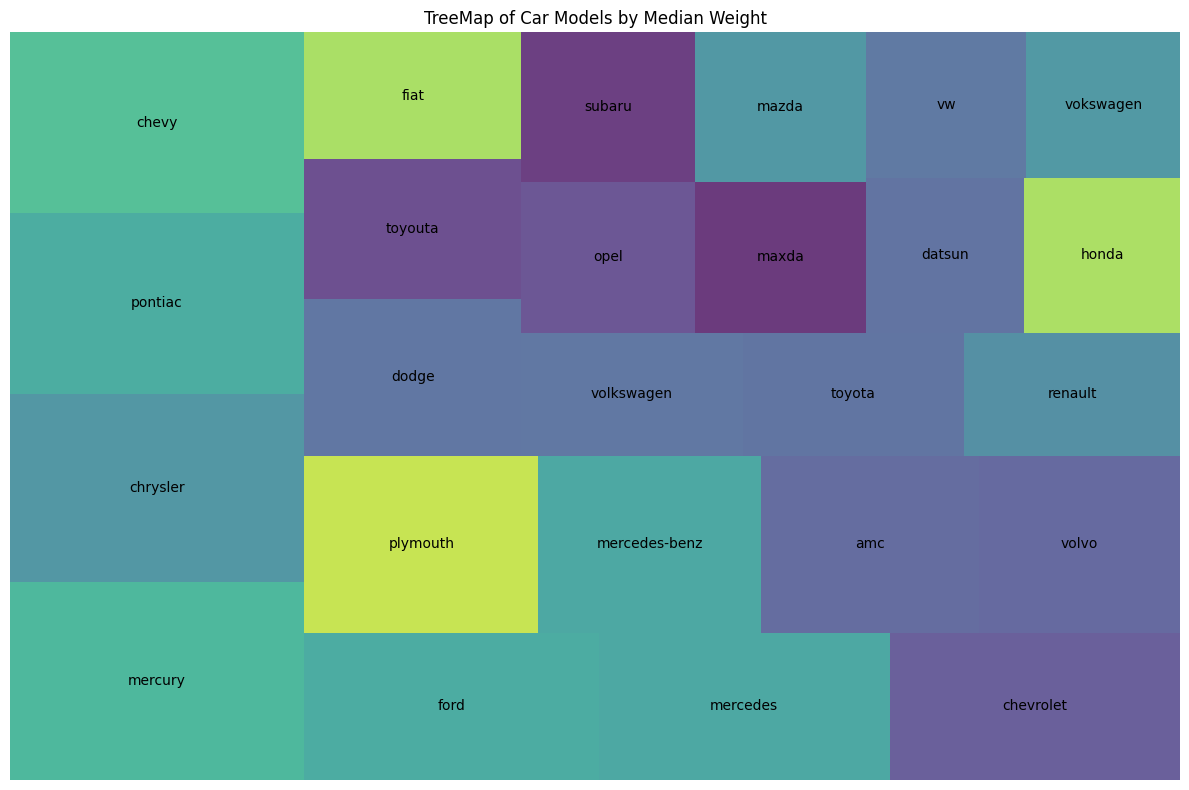

In [71]:
# Median weights of car models
weight_data_median = df_cleaned.groupby("Car model")["weight"].median().reset_index()

# Sorting based on weights
weight_data_median.sort_values(by="weight", ascending=False, inplace=True)

# TreeMap Creation
plt.figure(figsize=(12, 8))
squarify.plot(sizes=weight_data_median["weight"], label=weight_data_median["Car model"], alpha=0.8)
plt.axis('off')
plt.title('TreeMap of Car Models by Median Weight')
plt.tight_layout()

C:\Users\binmh\AppData\Local\Temp\ipykernel_12316\3821795533.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_mpg_median = df_cleaned.groupby("Car model")["mpg"].median().reset_index()


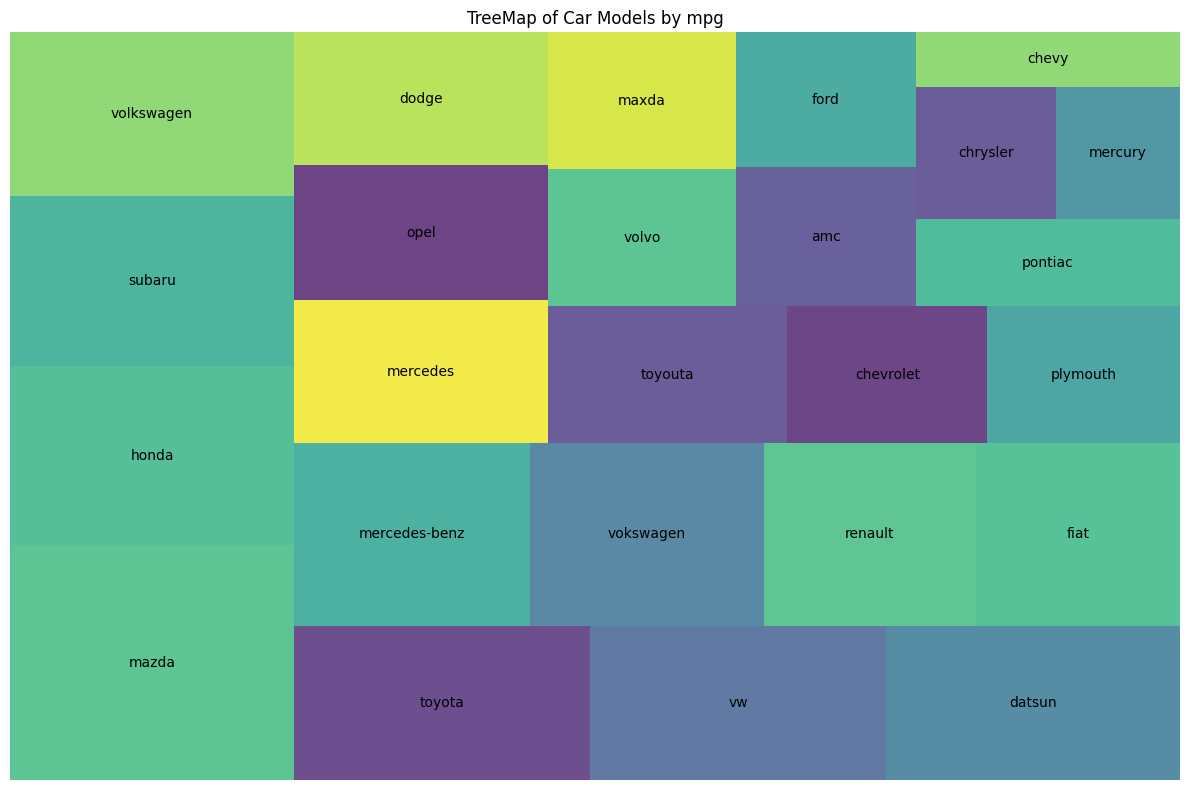

In [72]:
# Median mpg of car models
data_mpg_median = df_cleaned.groupby("Car model")["mpg"].median().reset_index()

# Sorting based on mpg
data_mpg_median.sort_values(by="mpg", ascending=False, inplace=True)

# Create a TreeMap
plt.figure(figsize=(12, 8))
squarify.plot(sizes=data_mpg_median["mpg"], label=data_mpg_median["Car model"], alpha=0.8)
plt.axis('off')
plt.title('TreeMap of Car Models by mpg')
plt.tight_layout()

## Standardization

In [73]:
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler

In [74]:
scaler = MinMaxScaler()

In [75]:
df_scaled = pd.DataFrame(scaler.fit_transform(df_cleaned_num), columns=df_cleaned_num.columns)

In [76]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           79 non-null     float64
 1   displacement  79 non-null     float64
 2   horsepower    79 non-null     float64
 3   weight        79 non-null     float64
 4   acceleration  79 non-null     float64
dtypes: float64(5)
memory usage: 3.2 KB


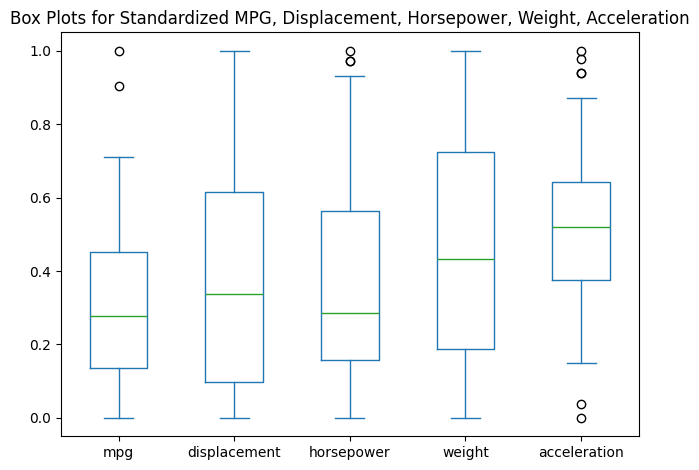

In [77]:
df_scaled[["mpg", "displacement", "horsepower", "weight", "acceleration"]].plot.box(whis=1)
plt.title("Box Plots for Standardized MPG, Displacement, Horsepower, Weight, Acceleration")
plt.tight_layout()

## Multivariate Analysis

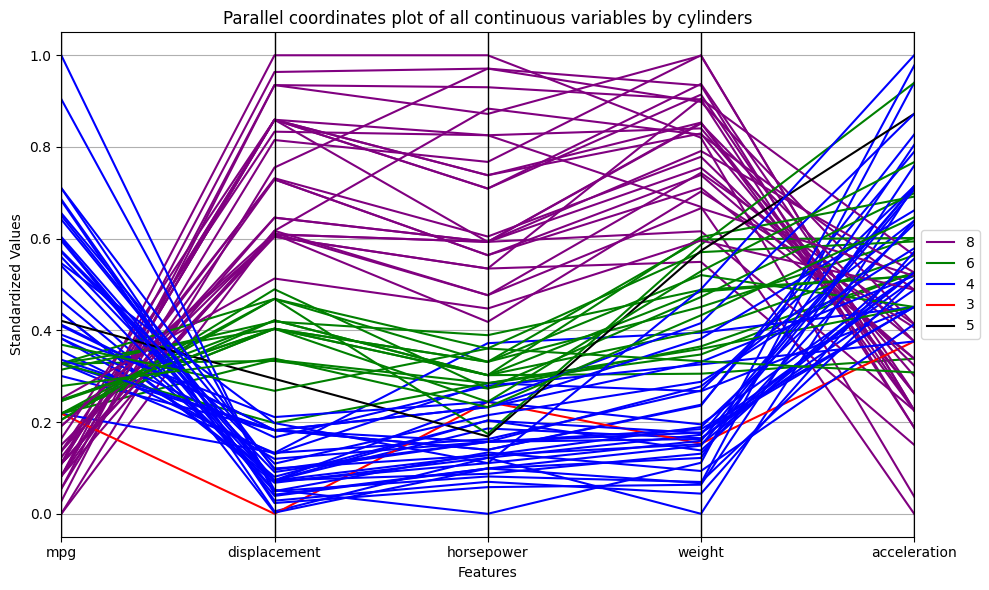

In [78]:
# Create a new dataframe with cylinders column and standardized dataframe
df_scaled_plus_cylinders = pd.concat([df_scaled, df_cleaned["cylinders"]], axis=1)
colors = ['purple', 'green', 'blue', 'red', 'black']

# Plot the parallel coordinates plot
plt.figure(figsize=(10, 6))
pd.plotting.parallel_coordinates(df_scaled_plus_cylinders, class_column="cylinders", color=colors)
plt.title('Parallel coordinates plot of all continuous variables by cylinders')
plt.xlabel('Features')
plt.ylabel('Standardized Values')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

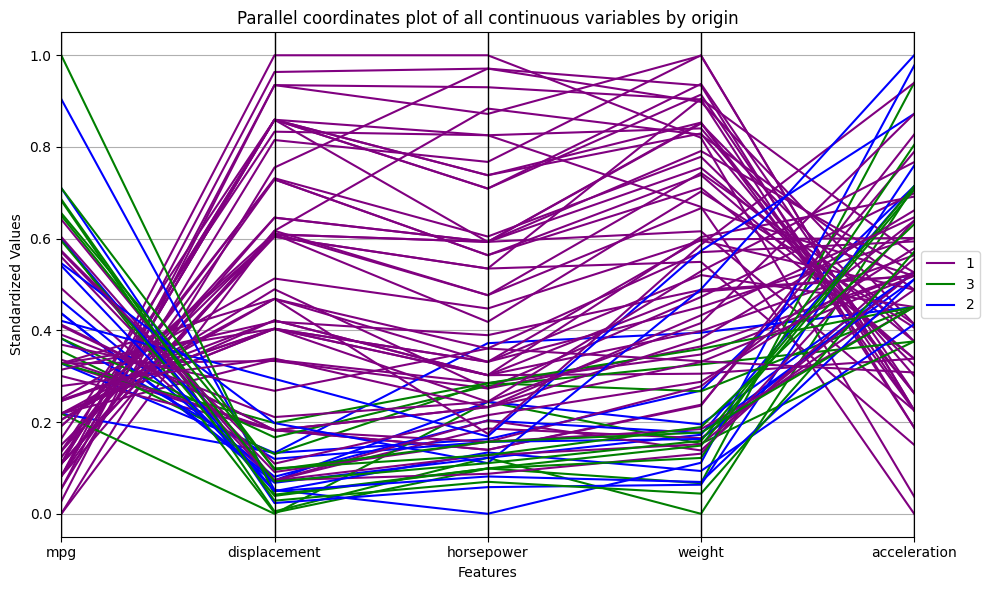

In [79]:
# Create a new dataframe with cylinders column and standardized dataframe
df_scaled_plus_origin = pd.concat([df_scaled, df_cleaned["origin"]], axis=1)
colors = ['purple', 'green', 'blue']

# Plot the parallel coordinates plot
plt.figure(figsize=(10, 6))
pd.plotting.parallel_coordinates(df_scaled_plus_origin, class_column="origin", color=colors)
plt.title('Parallel coordinates plot of all continuous variables by origin')
plt.xlabel('Features')
plt.ylabel('Standardized Values')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

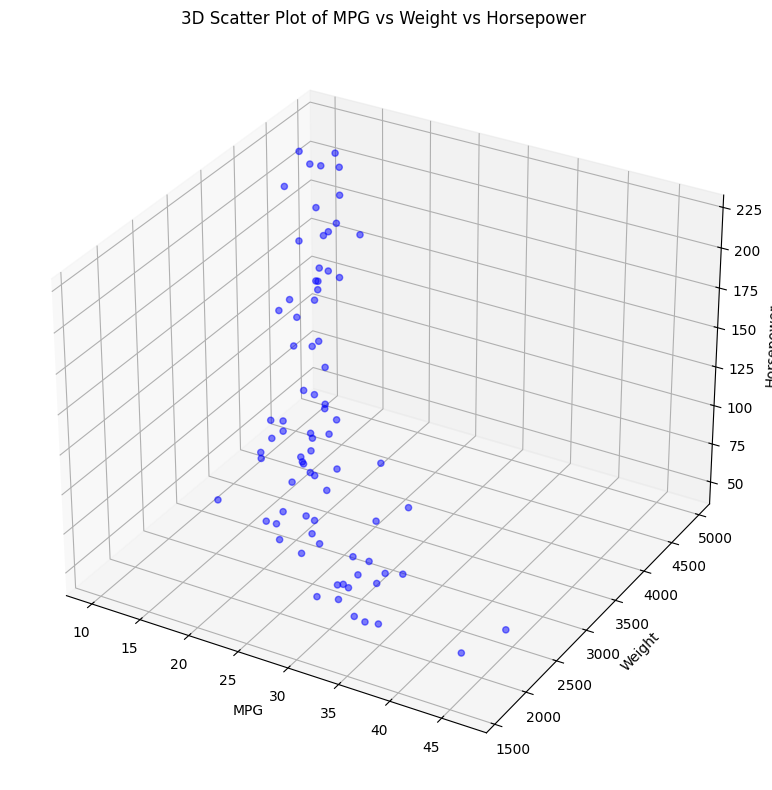

In [80]:
# 3d scatter plot
fig = plt.figure(figsize=(10, 8))
axes = fig.add_subplot(111, projection='3d')
axes.scatter(df_cleaned["mpg"], df_cleaned["weight"], df_cleaned["horsepower"], c='blue', marker='o', alpha=0.5)

axes.set_xlabel("MPG")
axes.set_ylabel("Weight")
axes.set_zlabel("Horsepower")
plt.title('3D Scatter Plot of MPG vs Weight vs Horsepower')
plt.tight_layout()

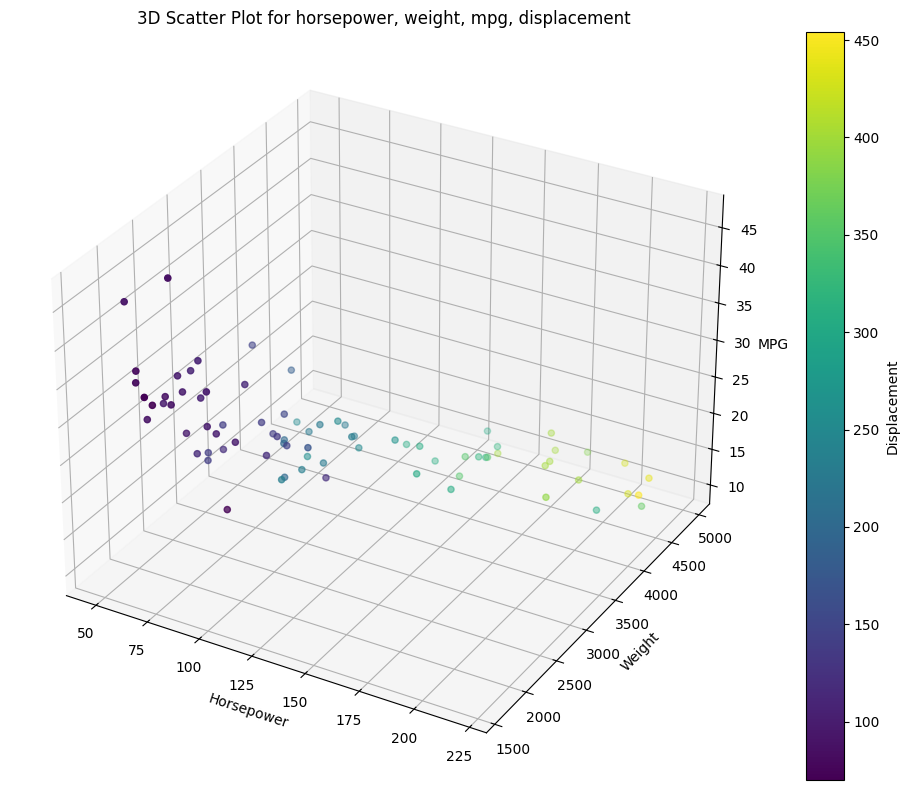

In [81]:
fig = plt.figure(figsize=(10, 8))
axes = fig.add_subplot(111, projection='3d')
scatter = axes.scatter(df_cleaned['horsepower'], df_cleaned['weight'], df_cleaned['mpg'], c=df_cleaned['displacement'], cmap='viridis')

axes.set_xlabel('Horsepower')
axes.set_ylabel('Weight')
axes.set_zlabel('MPG')
plt.colorbar(scatter, label='Displacement')
plt.title('3D Scatter Plot for horsepower, weight, mpg, displacement')
plt.tight_layout()

In [82]:
mpg = df_cleaned['mpg']
horsepower = df_cleaned['horsepower']
displacement = df_cleaned['displacement']
weight = df_cleaned['weight']
acceleration = df_cleaned['acceleration']
cylinders = df_cleaned['cylinders'].astype(str)
origin = df_cleaned['origin'].astype(str)
model_year = df_cleaned['model year'].astype(str)
car_model = df_cleaned['Car model'].astype(str)

# Colors for cylinders
colors = {'3': 'red', '4': 'green', '5': 'blue', '6': 'purple', '8': 'orange'}

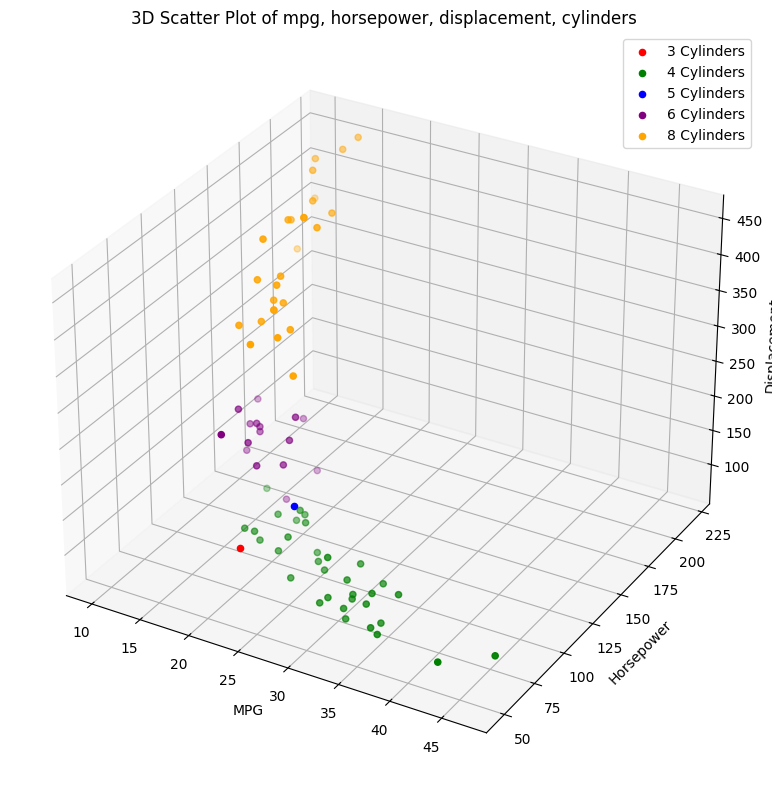

In [83]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Color code scatter plot
for cat, color in colors.items():
    ax.scatter(mpg[cylinders == cat], horsepower[cylinders == cat], displacement[cylinders == cat], c=color, label=f'{cat} Cylinders')

ax.set_xlabel('MPG')
ax.set_ylabel('Horsepower')
ax.set_zlabel('Displacement')
ax.set_title('3D Scatter Plot of mpg, horsepower, displacement, cylinders')
ax.legend()
plt.tight_layout()

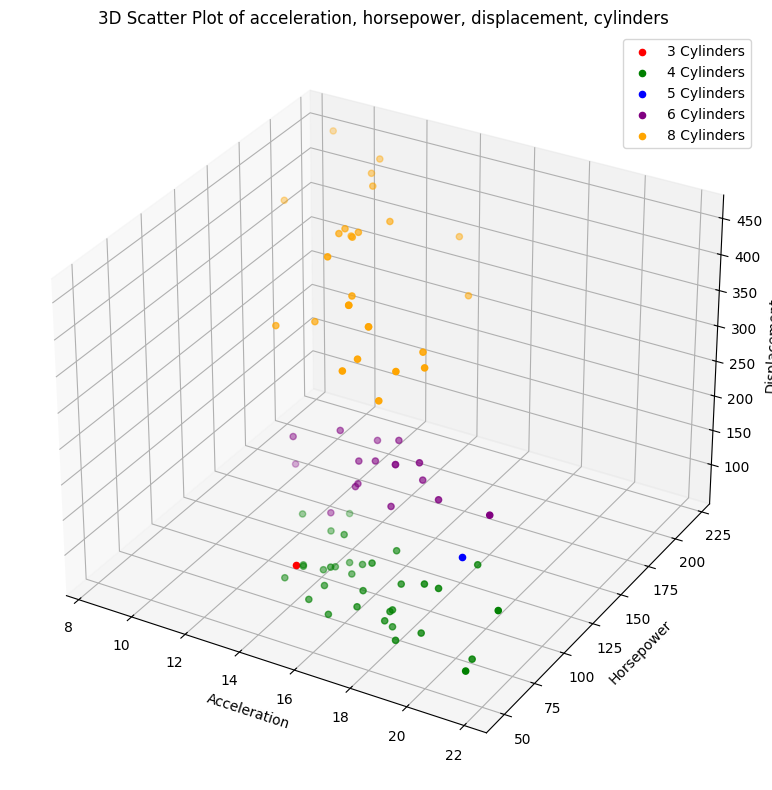

In [84]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Color code scatter plot
for cat, color in colors.items():
    ax.scatter(acceleration[cylinders == cat], horsepower[cylinders == cat], displacement[cylinders == cat], c=color, label=f'{cat} Cylinders')

ax.set_xlabel('Acceleration')
ax.set_ylabel('Horsepower')
ax.set_zlabel('Displacement')
ax.set_title('3D Scatter Plot of acceleration, horsepower, displacement, cylinders')
ax.legend()
plt.tight_layout()